# Programming Practice III

## 1 Overview

## 2 Tasks

In [11]:
import numpy as np
import matplotlib.pyplot as plt

### 2.1 Define Neural Network

In [12]:
# ----- useful functions from P2 -----
def create_toy_dataset(n_samples=100):
    x = np.linspace(-1,1,n_samples)
    y = 0.1*x + x**2 + x**3
    x = x.reshape(x.shape[0],1)
    y = y.reshape(y.shape[0],1)
    return x,y

def mse(y_true, y_pred):
    return np.mean((y_pred-y_true)**2)


def derivative_mse(y_true, y_pred):
    return -2*(np.mean((y_pred-y_true)))
    # TODO



#def update_parameters(parameters, gradient, learning_rate):
    
def update_parameters(w1, b1, w2, b2, dLdw1, dLdb1, dLdw2, dLdb2, learning_rate):
    w1 -=(learning_rate*dLdw1.T)
    b1 -=(learning_rate*dLdb1)
    w2 -=(learning_rate*dLdw2)
    b2 -=(learning_rate*dLdb2)
    return w1, b1, w2, b2

# ----- ReLU and its derivative -----
def relu(x):
    return x * (x > 0)
    # TODO

def derivative_relu(x):
    return 1 * (x > 0)

# sigmoid and its derivative
def sigmoid(x):
    return 1/(1+np.exp(-x))

def derivative_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

# forward pass or prediction 
def forward_pass(x, w1, b1, w2, b2):
    x=x.reshape(x.shape[0],1)
    # Output layer
    y_hat = np.dot(relu(np.dot(x, w1.T) + b1.T),w2) + b2
    return y_hat

def cal_gradient(x, y, y_hat, w1, b1, w2, b2):
    # Hidden layer
    Z1 = np.dot(x, w1.T) + b1.T
    A1 = sigmoid(Z1)
    # Output layer
    y_hat = np.dot(A1, w2) + b2
    m = x.shape[0]
    # Output layer
    dZ2 = y_hat - y
    dLdw2 = (1 / m) * np.dot(A1.T, dZ2)
    dLdb2 = (1 / m) * np.sum(dZ2, axis=0)
    # Hidden layer
    dZ1 = np.dot(dZ2, w2.T) * derivative_sigmoid(A1)
    dLdw1 = (1 / m) * np.dot(x.T, dZ1)
    dLdb1 = (1 / m) * np.sum(dZ1, axis=0)
    dLdb1 = dLdb1.reshape(dLdb1.shape[0],1)
    return dLdw1, dLdb1, dLdw2, dLdb2

In [13]:
class NeuralNetwork():
    def __init__(self, x, y, w1, b1, w2, b2, learning_rate, epcohs,step):
        np.random.seed(42)
        #n_nuerons_hidden_size = 500
        self.learning_rate = learning_rate
        self.w1 = w1
        self.w2 = w2
        self.b1 = b1
        self.b2 = b2
        self.x = x
        self.y = y
        self. epcohs = epcohs 
        self.step = step
        #step defines how often do you want to print the loss output whilst training
    
    def train(self):
        #n_inputs = self.x.shape[1]

        losses = np.array([1])
        for i in range(self.epcohs):
            # Forward propagation
            y_hat = forward_pass(self.x, self.w1, self.b1, self.w2, self.b2)
            # Backward propagation
            dLdw1, dLdb1, dLdw2, dLdb2 = cal_gradient(self.x, self.y, y_hat,self.w1, self.b1, self.w2, self.b2)
            self.w1, self.b1, self.w2, self.b2 = update_parameters(self.w1, self.b1, self.w2, self.b2, dLdw1, dLdb1, dLdw2, dLdb2, self.learning_rate)
            

            if (i+1) % self.step == 0:
                loss = mse(self.y, y_hat)
                losses = np.append(losses, loss)
                #print(self.y,y_hat)
                print(f"Epoch: {i+1}, Loss: {loss}")

        return self.w1 , self.b1, self.w2, self.b2 ,losses
    
        
    def losses(losses):
        return losses

    def predict(self):
        #self.x=self.x.reshape(self.x.shape[0],1)
        # Output layer
        y_hat = np.dot(sigmoid(np.dot(self.x, self.w1.T) + self.b1.T),self.w2) + self.b2
        return y_hat
    


### 2.2 Parameter Initialization

In [20]:
def initialize_parameters(method = 'Random', num_neurons = 500):

    # TODO: hyperparameters, parameter initialization, Initialize weights and biases
    methods = ['Zero','Random','Xavier','HE','Uniform','Pretrained']
    np.random.seed(42)
    n_nuerons_hidden_size = num_neurons
    if method == methods[0]:
        w1 = np.zeros((n_nuerons_hidden_size,1))
        b1 = np.zeros((n_nuerons_hidden_size,1))
        w2 = np.zeros((n_nuerons_hidden_size, 1))
        b2 = np.zeros((1, 1))

    elif method == methods[1]:
            w1 = np.random.randn(n_nuerons_hidden_size,1)
            b1 = np.random.randn(n_nuerons_hidden_size,1)
            w2 = np.random.randn(n_nuerons_hidden_size, 1)
            b2 = np.random.randn((1, 1))

    elif method == methods[2]:
            xavier_variance = 1 / n_nuerons_hidden_size
            w1 = np.random.randn(n_nuerons_hidden_size,1)* np.sqrt(xavier_variance)
            b1 = np.random.randn((n_nuerons_hidden_size,1))* np.sqrt(xavier_variance)
            w2 = np.random.randn(n_nuerons_hidden_size, 1)* np.sqrt(xavier_variance)
            b2 = np.random.randn((1, 1))* np.sqrt(xavier_variance)

    elif method == methods[3]:
            he_variance = 2 / n_nuerons_hidden_size
            w1 = np.random.randn(n_nuerons_hidden_size,1)* np.sqrt(he_variance)
            b1 = np.random.randn((n_nuerons_hidden_size,1))* np.sqrt(he_variance)
            w2 = np.random.randn(n_nuerons_hidden_size, 1)* np.sqrt(he_variance)
            b2 = np.random.randn((1, 1))* np.sqrt(he_variance)
    
    elif method == methods[4]:
            w1 = np.random.uniform(n_nuerons_hidden_size,1)
            b1 = np.random.uniform((n_nuerons_hidden_size,1))
            w2 = np.random.uniform(n_nuerons_hidden_size, 1)
            b2 = np.random.uniform((1, 1))

    elif method == methods[5]:
            w1 = np.random.randn(n_nuerons_hidden_size,1)
            b1 = np.zeros((n_nuerons_hidden_size,1))
            w2 = np.random.randn(n_nuerons_hidden_size, 1)
            b2 = np.zeros((1, 1))

    return w1, b1, w2, b2

In [21]:
# TODO: train neural networks with different intialization methods
# TODO: visualize the results
# datasets # Generate sample input data

n_samples = 1000
x , y = create_toy_dataset(n_samples)


# TODO: hyperparameters, parameter initialization, Initialize weights and biases
# different types of initialization are: 
# 'Zero','Random','Xavier','HE','Uniform','Pretrained'
w1, b1, w2, b2 = initialize_parameters(method = 'Zero', num_neurons = 500)

learning_rate = 0.01
epcohs = 10000
step = 500

# TODO: training
NN = NeuralNetwork(x, y, w1, b1, w2, b2, learning_rate, epcohs, step)
w1, b1, w2, b2 , losses = NN.train()

#x, y,  w1, b1,  w2, b2, learning_rate , epcohs
# Normalize the input data
#X_normalized = X / np.max(X)

# Train the neural network


# Predict using the trained network
predictions = NN.predict()

Epoch: 500, Loss: 0.38620712168841626
Epoch: 1000, Loss: 0.3862997451861116
Epoch: 1500, Loss: 0.38653273881617606
Epoch: 2000, Loss: 0.38690660010006256
Epoch: 2500, Loss: 0.3874221847954637
Epoch: 3000, Loss: 0.3880807082293372
Epoch: 3500, Loss: 0.38888374752844596
Epoch: 4000, Loss: 0.3898332447460245
Epoch: 4500, Loss: 0.3909315108850369
Epoch: 5000, Loss: 0.3921812308181034
Epoch: 5500, Loss: 0.3935854691219534
Epoch: 6000, Loss: 0.3951476768098789
Epoch: 6500, Loss: 0.39687169899036123
Epoch: 7000, Loss: 0.3987617834537496
Epoch: 7500, Loss: 0.4008225902004363
Epoch: 8000, Loss: 0.4030592019242567
Epoch: 8500, Loss: 0.4054771354665152
Epoch: 9000, Loss: 0.4080823542576437
Epoch: 9500, Loss: 0.41088128176506883
Epoch: 10000, Loss: 0.41388081596735593


### 2.3 Learning Rate

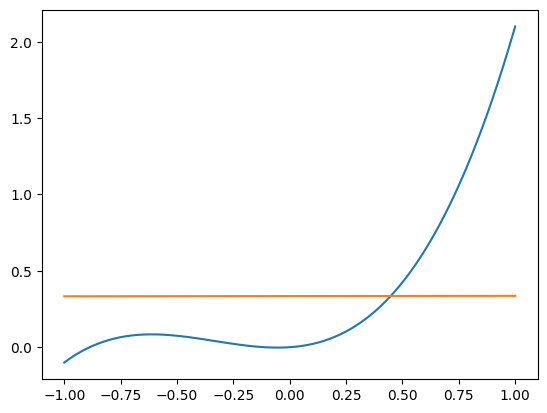

In [16]:
# TODO: train neural networks with different learning rates
# TODO: visualize the results

plt.plot(x,y)
plt.plot(x,predictions)

In [19]:
# TODO: train neural networks with different intialization methods
# TODO: visualize the results
# datasets # Generate sample input data

n_samples = 1000
x , y = create_toy_dataset(n_samples)


# TODO: hyperparameters, parameter initialization, Initialize weights and biases
# different types of initialization are: 
# 'Zero','Random','Xavier','HE','Uniform','Pretrained'
w1, b1, w2, b2 = initialize_parameters(method = 'Random', num_neurons = 500)

learning_rate = 0.01
epcohs = 10000
step = 500

# TODO: training
NN = NeuralNetwork(x, y, w1, b1, w2, b2, learning_rate, epcohs, step)
w1, b1, w2, b2 , losses = NN.train()

#x, y,  w1, b1,  w2, b2, learning_rate , epcohs
# Normalize the input data
#X_normalized = X / np.max(X)

# Train the neural network


# Predict using the trained network
predictions = NN.predict()

plt.plot(x,y)
plt.plot(x,predictions)

TypeError: 'tuple' object cannot be interpreted as an integer

### 2.4 Network Capacity

In [17]:
# TODO: train neural networks with different capacities
# TODO: visualize the results

print(mse(y, predictions))

0.27579374236953175


### 2.5 Regularization

In [18]:
class NeuralNetwork():
    def __init__(self, parameters, learning_rate, step):
        # TODO
    
    def train(self, x, y, epochs, decay):
        # TODO
        # You can modify here to add the gradients for the regularization terms
    
    def predict(self, x):
        # TODO

IndentationError: expected an indented block after function definition on line 2 (1097356877.py, line 5)

In [ ]:
# TODO: train neural networks with different decays
# TODO: visualize the results

In [ ]:
class Account:
    def __init__(self, account_number, account_holder, balance):
        self.account_number = account_number
        self.account_holder = account_holder
        self.balance = balance

    def deposit(self, amount):
        self.balance += amount
        #print(f"Deposited {amount}. New balance: {self.balance}")
        return self.balance

    def withdraw(self, amount):
        if amount <= self.balance:
            self.balance -= amount
            print(f"Withdrew {amount}. New balance: {self.balance}")
        else:
            print("Insufficient balance!")

    def display_details(self):
        print("Account Details:")
        print(f"Account Number: {self.account_number}")
        print(f"Account Holder: {self.account_holder}")
        print(f"Balance: {self.balance}")


class SavingsAccount(Account):
    def __init__(self, account_number, account_holder, balance, interest_rate):
        super().__init__(account_number, account_holder, balance)
        self.interest_rate = interest_rate

    def calculate_interest(self):
        interest = self.balance * (self.interest_rate / 100)
        self.balance += interest
        print(f"Interest calculated: {interest}. New balance: {self.balance}")

    def withdraw(self, amount):
        super().withdraw(amount)  # Call the withdraw method of the base class
        self.calculate_interest()


class CurrentAccount(Account):
    def __init__(self, account_number, account_holder, balance, overdraft_limit):
        super().__init__(account_number, account_holder, balance)
        self.overdraft_limit = overdraft_limit

    def withdraw(self, amount):
        if amount <= (self.balance + self.overdraft_limit):
            self.balance -= amount
            print(f"Withdrew {amount}. New balance: {self.balance}")
        else:
            print("Cannot withdraw beyond overdraft limit!")

# Example usage
savings_account = SavingsAccount("SA001", "John Doe", 5000, 5)
savings_account.display_details()  # Output account details

balance = savings_account.deposit(2000)  # Deposit money
print('balance',balance)
savings_account.withdraw(1500)  # Withdraw money

current_account = CurrentAccount("CA001", "Jane Smith", 10000, 5000)
current_account.display_details()  # Output account details

current_account.deposit(3000)  # Deposit money
current_account.withdraw(12000)  # Attempt to withdraw more than balance + overdraft limit


Account Details:
Account Number: SA001
Account Holder: John Doe
Balance: 5000
balance 7000
Withdrew 1500. New balance: 5500
Interest calculated: 275.0. New balance: 5775.0
Account Details:
Account Number: CA001
Account Holder: Jane Smith
Balance: 10000
Withdrew 12000. New balance: 1000
